## <p style="text-align: center;">About the notebook</p>

### Notes and figures for the Appendix A of the manuscript:

- Kong et al. (2021): Summer temperature distribution in response to cropping intensification: lessons learned from an idealized land model
- This notebook includes figures of key variables from the SLIM input forcing file. Please refer to the manuscript and the [github repo](https://github.com/wenwenkong/SLIM_experiments) for more details regarding the file generation.

### For questions, please contact:

- [Wenwen Kong](https://www.wenwenkong.com) (wenwenkong@ucla.edu), University of California, Los Angeles

### Last updated on: April 27, 2021
---

## Contents

1. [Overview and references](#overviewandreference)
2. [Typical variables in the SLIM forcing file](#table)
3. [Visualizations of the SLIM forcing file](#plots)
    - [a. glc_mask](#glc_mask)
    - [b. albedo](#albedo)
    - [c. bucketdepth](#bucketdepth)
    - [d. snowmask](#snowmask)
    - [e. roughness](#roughness)
    - [f. soil thermal properties](#soil-thermal)
---

____________
<a id='overviewandreference'></a>

## 1. Overview and references
____________

### About SLIM
   * The SLIM (Simple Land Interface Model) was deveoped by [Dr. Marysa Laguë](https://marysalague.com).
   * The official reference for SLIM is [Laguë et al., 2019](https://journals.ametsoc.org/jcli/article/32/18/5725/344078/Separating-the-Impact-of-Individual-Land-Surface).
   * The source code of SLIM is provided [here](https://github.com/marysa/SimpleLand) on github. In that repository, you can find a [SLIM wiki](https://github.com/marysa/SimpleLand/wiki) that Marysa wrote for interested users.
   
### References
   *  [Laguë et al., 2019, Separating the impact of individual land surface properties on the terrestrial surface energy budget in both the coupled and un-coupled land-atmosphere system](https://journals.ametsoc.org/jcli/article/32/18/5725/344078/Separating-the-Impact-of-Individual-Land-Surface)
   * CLM 5.0 documentation [html](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/index.html), [pdf](http://www.cesm.ucar.edu/models/cesm2/land/CLM50_Tech_Note.pdf)
   * [LSM 1.0 documentation](https://opensky.ucar.edu/islandora/object/technotes:185)

---

____________
<a id='table'></a>
## 2. Typical variables in the SLIM forcing file
____________

  * The table below is contructed following Table 1 from Supplemental Material of "Separating the impact of individual land surface properties on the terrestrial surface energy budget in both the coupled and un-coupled land-atmosphere system" by [Laguë et al., 2019](https://journals.ametsoc.org/jcli/article/32/18/5725/344078/Separating-the-Impact-of-Individual-Land-Surface). Users can use this table as a reference of meaning, units, and typical values of each SLIM input variable.
    
| Tag | Description | Typical value |Units |
| --- | --- | --- | ---| 
| glc_mask | Mask marking gridcells which should be treated as glaciers/ice sheets | logical | unitless | 
| alb_gvd | Visible direct albedo for bare ground | 0.2 | unitless | 
| alb_svd | Visible direct albedo for deep snow | 0.8 | unitless | 
| alb_gnd | Near-infrared direct albedo for bare ground | 0.3 | unitless | 
| alb_snd | Near-infrared direct albedo for deep snow | 0.6 | unitless | 
| alb_gvf | Visible diffuse albedo for bare ground | 0.2 | unitless | 
| alb_svf | Visible diffuse albedo for deep snow | 0.8 | unitless | 
| alb_gnf | Near-infrared diffuse albedo for bare ground | 0.3 | unitless | 
| alb_snf | Near-infrared diffuse albedo for deep snow | 0.6 | unitless | 
| bucketdepth | Bucket capacity: maximum amount of water the soil can hold | 200 | kg/m2 | 
| emissivity | Surface emissivity for longwave radiation (set to one) | 0.9-1.0 | unitless | 
| snowmask | Snow-masking depth: mass of water required in snow bucket to fully mask the bare ground albedo | 50 | kg/m2 | 
| roughness | Vegetation height; used to calculate roughness lengths for momentum and heat | | m |
| evap_res | "Lid" resistance to evaporation | 1000 | s/m | 
| l2xavg_Fall_flxdst1 | Dust flux bin 1 | 1e-9 | kg/m2/s|
| l2xavg_Fall_flxdst2 | Dust flux bin 2 | 1e-9 | kg/m2/s|
| l2xavg_Fall_flxdst3 | Dust flux bin 3 | 1e-9 | kg/m2/s|
| l2xavg_Fall_flxdst4 | Dust flux bin 4 | 1e-9 | kg/m2/s|
| soil_type | Currently useless (set to zero) | | |
| soil_tk_1d | Thermal conductivity of soil (used for whole column) | 1.5 | W/m/K | 
| soil_cv_1d | Heat capacity of soil (used for whole column where glaciated) | 2.4 | J/m3/K | 
| glc_tk_1d | Thermal conductivity of ice (used for whole column where glaciated) | 2.4 | W/m/K | 
| glc_cv_1d | Heat capacity of ice (used for whole column where glaciated) | 1.9e6 | J/m3/K | 

***

____________
<a id='plots'></a>
## 3. Visualizations of the SLIM forcing file
____________



### Import libraries 

In [4]:
%matplotlib inline 
import sys

# netcdf/numpy/xarray
import numpy as np
import netCDF4 as nc
import numpy.matlib
import datetime
import xarray as xr

from scipy import interpolate
from numpy import ma 
from scipy import stats

import scipy.io as sio
import pickle as pickle
from sklearn import linear_model
import numpy.ma as ma

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

# mpl_toolkits
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

# cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

### Load in data

In [5]:
file    = '/glade/work/kwenwen/SLIM/data_for_inputs/slim_ctrl/slim2deg_fromCMIP6-AMIP-1deg_ensemble001-010_1991to2010clim_max-ctrl-bucket_rs150.nc/'
figdir  = '/glade/u/home/kwenwen/work/Postdoc_work/JupyterNotebooks/Tvar_SLIM_rs_draft/'
ds      = xr.open_dataset(file)
ds

month     = 7 # plot July 
month_ind = month -1 # python index starts at 0

____________
<a id='glc_mask'></a>

### a. glc_mask




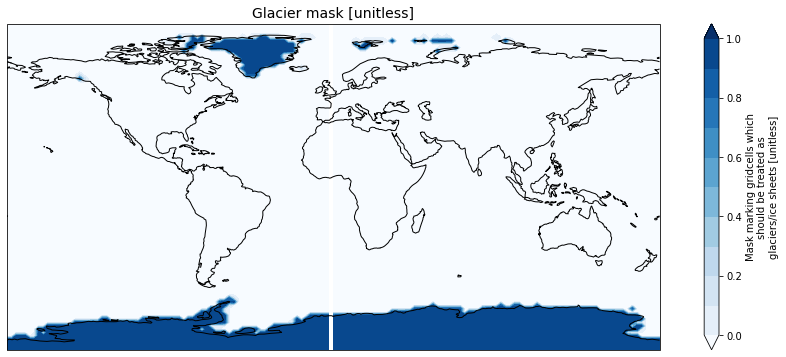

In [6]:
cmax    = 1.
cmin    = 0.
cint    = (cmax - cmin)/10.

fig = plt.figure(figsize=(16, 6))
ax  = fig.add_subplot(projection=ccrs.PlateCarree())
plot= ds['glc_mask'][month_ind].plot.contourf(ax=ax, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax.set_title('Glacier mask [unitless]', fontsize=14)
ax.set_global()
ax.coastlines()

plt.savefig(figdir + 'FigA1_glc_mask.png', dpi=300, orientation='portrait', bbox_inches='tight')

____________
<a id='glc_mask'></a>

### b. albedo
____________


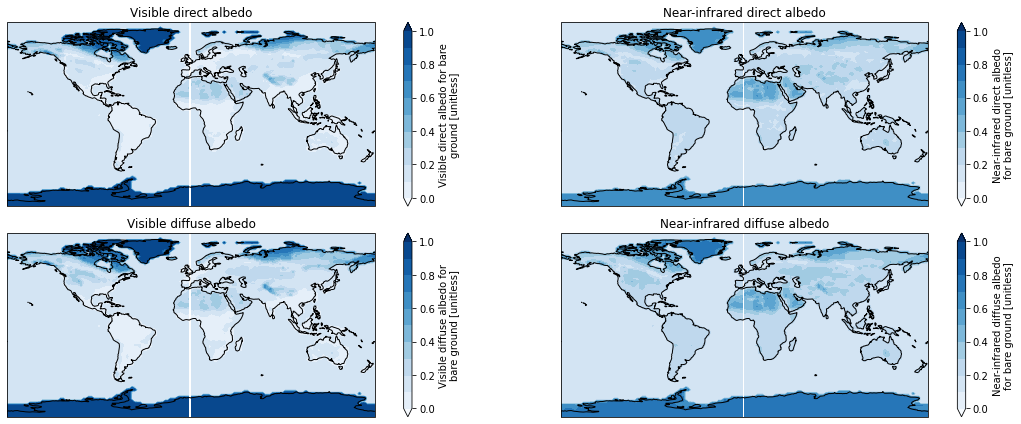

In [7]:
fig = plt.figure(figsize=(16,6))
plt.suptitle('', fontsize=15)

cmax    = 1.
cmin    = 0.
cint    = (cmax - cmin)/10.

ax1     = plt.subplot(221, projection=ccrs.PlateCarree());
plot1   = ds['alb_gvd'][month_ind].plot.contourf(ax=ax1, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax1.set_title('Visible direct albedo')
ax1.set_global()
ax1.coastlines()

ax2     = plt.subplot(222, projection=ccrs.PlateCarree());
plot2   = ds['alb_gnd'][month_ind].plot.contourf(ax=ax2, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax2.set_title('Near-infrared direct albedo')
ax2.set_global()
ax2.coastlines()

ax3     = plt.subplot(223, projection=ccrs.PlateCarree());
plot3   = ds['alb_gvf'][month_ind].plot.contourf(ax=ax3, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax3.set_title('Visible diffuse albedo')
ax3.set_global()
ax3.coastlines()

ax4     = plt.subplot(224, projection=ccrs.PlateCarree());
plot4   = ds['alb_gnf'][month_ind].plot.contourf(ax=ax4, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax4.set_title('Near-infrared diffuse albedo')
ax4.set_global()
ax4.coastlines()

plt.tight_layout()

plt.savefig(figdir + 'FigA2_albedo.png', dpi=300, orientation='portrait', bbox_inches='tight')


____________
<a id='bucketdepth'></a>

### c. bucketdepth
____________

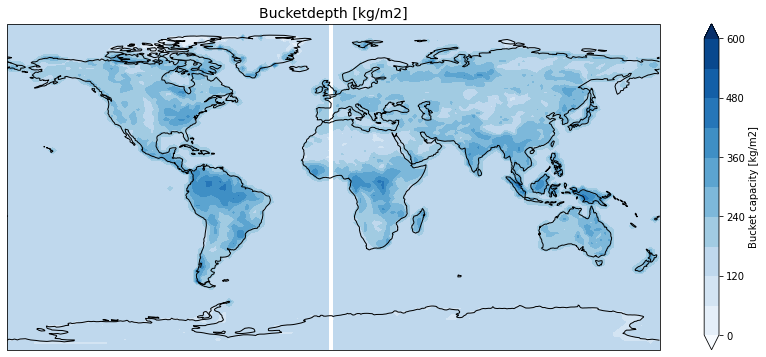

In [8]:
cmax    = 600.
cmin    = 0.
cint    = (cmax - cmin)/10.

fig = plt.figure(figsize=(16, 6))
ax  = fig.add_subplot(projection=ccrs.PlateCarree())
plot= ds['bucketdepth'][month_ind].plot.contourf(ax=ax, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax.set_title('Bucketdepth [kg/m2]', fontsize=14)
ax.set_global()
ax.coastlines()

plt.savefig(figdir + 'FigA3_bucketdepth.png', dpi=300, orientation='portrait', bbox_inches='tight')

____________
<a id='snowmask'></a>

### d. snowmask
____________

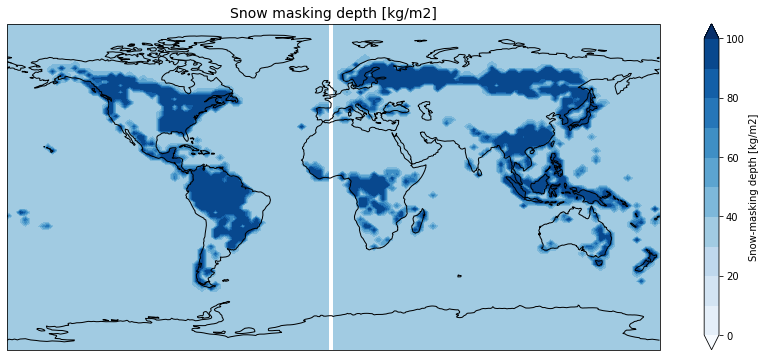

In [9]:
cmax    = 100.
cmin    = 0.
cint    = (cmax - cmin)/10.

fig = plt.figure(figsize=(16, 6))
ax  = fig.add_subplot(projection=ccrs.PlateCarree())
plot= ds['snowmask'][month_ind].plot.contourf(ax=ax, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax.set_title('Snow masking depth [kg/m2]', fontsize=14)
ax.set_global()
ax.coastlines()

plt.savefig(figdir + 'FigA4_snowmask.png', dpi=300, orientation='portrait', bbox_inches='tight')

____________
<a id='roughness'></a>

### e. roughness
____________

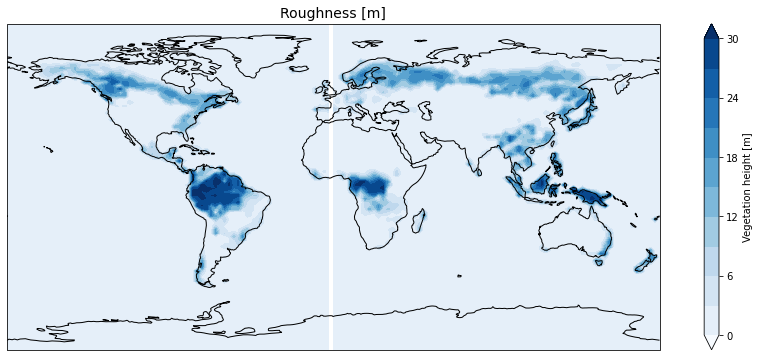

In [11]:
cmax    = 30.
cmin    = 0.
cint    = (cmax - cmin)/10.

fig = plt.figure(figsize=(16, 6))
ax  = fig.add_subplot(projection=ccrs.PlateCarree())
plot= ds['roughness'][month_ind].plot.contourf(ax=ax, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax.set_title('Roughness [m]', fontsize=14)
ax.set_global()
ax.coastlines()

plt.savefig(figdir + 'FigA5_roughness.png', dpi=300, orientation='portrait', bbox_inches='tight')

____________
<a id='soil-thermal'></a>

### f. soil thermal properties
____________

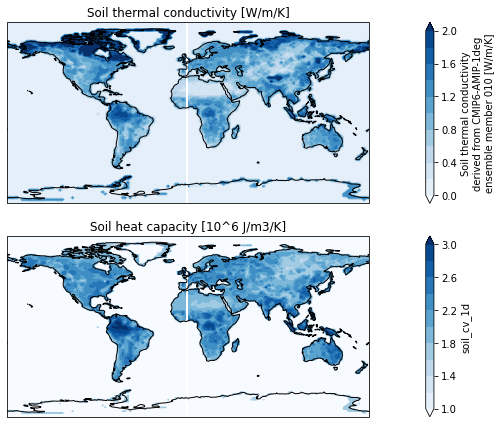

In [12]:
fig = plt.figure(figsize=(16,6))
plt.suptitle('', fontsize=15)

cmax    = 2.
cmin    = 0.
cint    = (cmax - cmin)/10.

ax1     = plt.subplot(211, projection=ccrs.PlateCarree());
plot1   = ds['soil_tk_1d'][month_ind].plot.contourf(ax=ax1, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax1.set_title('Soil thermal conductivity [W/m/K]')
ax1.set_global()
ax1.coastlines()

cmax    = 3.
cmin    = 1.
cint    = (cmax - cmin)/10.

ax2     = plt.subplot(212, projection=ccrs.PlateCarree());
plot2   = (ds['soil_cv_1d'][month_ind]*1e-6).plot.contourf(ax=ax2, levels = np.arange(cmin,cmax+cint,cint), cmap='Blues', extend='both')
ax2.set_title('Soil heat capacity [10^6 J/m3/K]')
ax2.set_global()
ax2.coastlines()

plt.tight_layout()

plt.savefig(figdir + 'FigA6_soil_thermal.png', dpi=300, orientation='portrait', bbox_inches='tight')